In [45]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [46]:
import pandas as pd

In [47]:
#loading dataset as dataframe
dataframe=pd.read_csv(r"/content/drive/MyDrive/coursework/purchase_data.csv")

In [48]:
#dataset
print(dataframe.dtypes)

Customer_ID          object
Product_Category     object
Purchase_Amount     float64
Timestamp            object
dtype: object


In [49]:
print("missing values count \n")
print(dataframe.isnull().sum())
#no missing values

missing values count 

Customer_ID         0
Product_Category    0
Purchase_Amount     0
Timestamp           0
dtype: int64


In [50]:
dataframe

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C042,Toys,86.08,17/09/2024 13:02
1,C020,Home Appliances,16.03,24/07/2024 13:34
2,C006,Sports,133.91,12/02/2024 00:52
3,C010,Sports,441.33,04/02/2024 05:49
4,C017,Sports,12.02,13/01/2024 13:02
...,...,...,...,...
95,C031,Books,376.21,17/05/2024 05:29
96,C024,Home Appliances,336.36,24/08/2024 00:41
97,C001,Clothing,346.04,26/09/2024 18:12
98,C058,Electronics,348.60,05/10/2024 04:50


In [51]:
# Convert the 'Timestamp' column from string format to a datetime object for easier date/time manipulation and analysis.
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'])

<ipython-input-51-5e14bfd5c253>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'])


In [52]:
dataframe

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C042,Toys,86.08,2024-09-17 13:02:00
1,C020,Home Appliances,16.03,2024-07-24 13:34:00
2,C006,Sports,133.91,2024-02-12 00:52:00
3,C010,Sports,441.33,2024-02-04 05:49:00
4,C017,Sports,12.02,2024-01-13 13:02:00
...,...,...,...,...
95,C031,Books,376.21,2024-05-17 05:29:00
96,C024,Home Appliances,336.36,2024-08-24 00:41:00
97,C001,Clothing,346.04,2024-09-26 18:12:00
98,C058,Electronics,348.60,2024-10-05 04:50:00


In [53]:
# Convert the 'Purchase_Amount' column to numeric format to ensure proper calculations; invalid values are set to NaN if conversion fails
dataframe['Purchase_Amount'] = pd.to_numeric(dataframe['Purchase_Amount'], errors='coerce')

In [54]:
dataframe

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C042,Toys,86.08,2024-09-17 13:02:00
1,C020,Home Appliances,16.03,2024-07-24 13:34:00
2,C006,Sports,133.91,2024-02-12 00:52:00
3,C010,Sports,441.33,2024-02-04 05:49:00
4,C017,Sports,12.02,2024-01-13 13:02:00
...,...,...,...,...
95,C031,Books,376.21,2024-05-17 05:29:00
96,C024,Home Appliances,336.36,2024-08-24 00:41:00
97,C001,Clothing,346.04,2024-09-26 18:12:00
98,C058,Electronics,348.60,2024-10-05 04:50:00


In [55]:
 # Summary statistics
summary_stats = dataframe['Purchase_Amount'].describe()
print(summary_stats)

count    100.000000
mean     243.364500
std      136.657595
min       11.670000
25%      127.827500
50%      233.320000
75%      367.245000
max      494.000000
Name: Purchase_Amount, dtype: float64


In [56]:
 # Total purchases over time
total_purchases_by_date = dataframe.groupby(dataframe['Timestamp'].dt.date)['Purchase_Amount'].sum()
print(total_purchases_by_date)

Timestamp
2024-01-05    200.25
2024-01-09    432.11
2024-01-10    437.42
2024-01-12    157.68
2024-01-13     12.02
               ...  
2024-12-03    187.68
2024-12-07    215.84
2024-12-08    196.11
2024-12-11    411.85
2024-12-13    147.88
Name: Purchase_Amount, Length: 92, dtype: float64


In [57]:
total_purchases_by_date

,Purchase_Amount
Timestamp,
2024-01-05,200.25
2024-01-09,432.11
2024-01-10,437.42
2024-01-12,157.68
2024-01-13,12.02
...,...
2024-12-03,187.68
2024-12-07,215.84
2024-12-08,196.11


In [58]:
# Most popular product categories
category_popularity = dataframe['Product_Category'].value_counts()
category_popularity

,count
Product_Category,
Home Appliances,20
Books,19
Sports,17
Clothing,17
Electronics,14
Toys,13


In [59]:
# Average spending per customer
avg_spending_per_customer = dataframe.groupby('Customer_ID')['Purchase_Amount'].mean()
avg_spending_per_customer

,Purchase_Amount
Customer_ID,
C001,222.845000
C003,295.950000
C004,283.745000
C006,175.830000
C009,240.057500
C010,437.056667
C011,249.042500
C013,191.166667
C014,466.740000


In [60]:
#most active customer
most_active_customer = dataframe.groupby('Customer_ID').size().idxmax()
most_active_customer

'C009'

Text(0, 0.5, 'Total Sales')

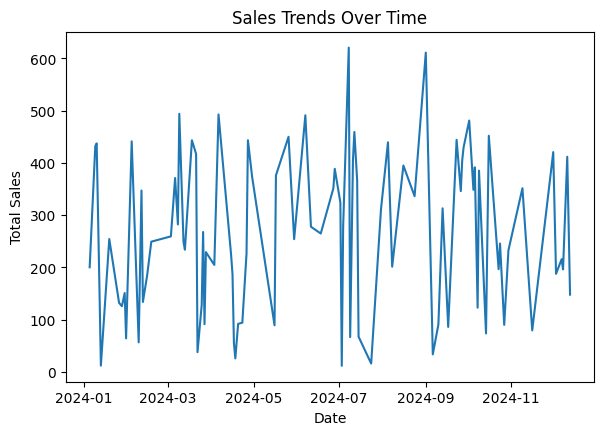

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Line chart: Sales trends over time
plt.subplot(2, 2, 1)
dataframe.groupby(dataframe['Timestamp'].dt.date)['Purchase_Amount'].sum().plot(kind='line')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Number of Purchases')

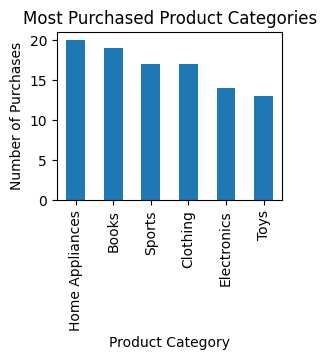

In [62]:
# Bar chart: Most purchased product categories
plt.subplot(2, 2, 2)
dataframe['Product_Category'].value_counts().plot(kind='bar')
plt.title('Most Purchased Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')

Text(0.5, 1.0, 'Revenue by Product Category')

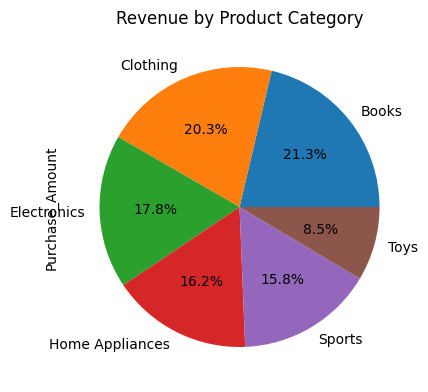

In [63]:
# Pie chart: Percentage of revenue from different product categories
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 3)
category_revenue = dataframe.groupby('Product_Category')['Purchase_Amount'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue by Product Category')


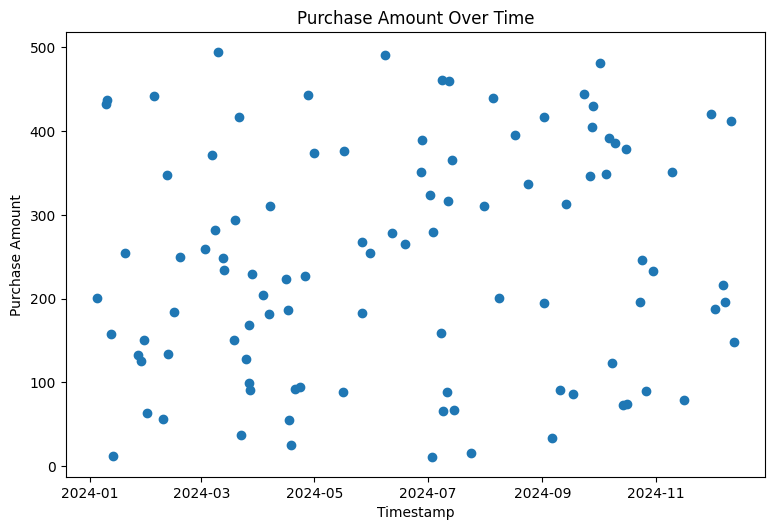

In [64]:
  # Scatter plot: Purchase amount vs Time
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
plt.scatter(dataframe['Timestamp'], dataframe['Purchase_Amount'])
plt.title('Purchase Amount Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Purchase Amount')

plt.tight_layout()
plt.show()

In [65]:
#packages for webscraping
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [66]:
#because of the website security not accessible to all products
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("h1", attrs={"id":'main-title'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={"data-fs-element":"price"}).text.strip().replace("Now ", "").replace("$", "")

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating and reviews
def get_rating(soup):

    try:
        rating = soup.find("span", attrs={"class":'w_iUH7'}).text.strip()

    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""

    return rating



In [67]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.walmart.com/search?q=electronics"  #in my dataset there were 6 categories so i scraped each category data separately #1electronics

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'w-100 h-100 z-1 hide-sibling-opacity absolute','link-identifier': True})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        if 'href' in link.attrs:
            links_list.append(link['href'])

# Clean up URLs to get consistent format
    links_list = [link if link.startswith('http') else f"https://www.walmart.com{link}" for link in links_list]

    d = {"title":[], "price":[], "rating":[], "Product_Category": []}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['Product_Category'].append("Electronics")


    walmart_df_elec = pd.DataFrame.from_dict(d)
    walmart_df_elec['title'].replace('', np.nan, inplace=True)
    walmart_df_elec = walmart_df_elec.dropna(subset=['title'])

walmart_df_elec


<ipython-input-67-646a37436c24>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  walmart_df_elec['title'].replace('', np.nan, inplace=True)


,title,price,rating,Product_Category
0,Dirt Devil Smart Robot Vacuum with Real-Time M...,99.00,4.2 stars out of 404 reviews,Electronics
1,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prepa...",69.88,3.7 stars out of 1345 reviews,Electronics
2,"onn. 10.1"" Kids Tablet, 32GB, (2024 Model) - Blue",109.00,4.4 stars out of 540 reviews,Electronics
3,"onn. 8"" Kids Tablet, 32GB, (2024 Model) - Aqua",89.00,4.5 stars out of 453 reviews,Electronics
4,onn. 32” Class HD (720P) LED Roku Smart Televi...,88.00,4.5 stars out of 41899 reviews,Electronics
5,"Vivitar Popsnap Digital Camera, Pink, 16x Zoom...",29.83,4.3 stars out of 465 reviews,Electronics
6,HP Stream 14 inch Windows Laptop Intel Process...,190.00,4.1 stars out of 14215 reviews,Electronics
7,"Apple AirTag - 1 Pack, Item Tracker with Apple...",24.00,4.6 stars out of 1708 reviews,Electronics
8,onn. 65” Class 4K UHD (2160P) LED Roku Smart T...,298.00,4.4 stars out of 26132 reviews,Electronics


In [68]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.walmart.com/search?q=toys"   #2toys

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'w-100 h-100 z-1 hide-sibling-opacity absolute','link-identifier': True})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        if 'href' in link.attrs:
            links_list.append(link['href'])

# Clean up URLs to get consistent format
    links_list = [link if link.startswith('http') else f"https://www.walmart.com{link}" for link in links_list]

    d = {"title":[], "price":[], "rating":[],"Product_Category":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['Product_Category'].append("Toys")

    walmart_df_toy = pd.DataFrame.from_dict(d)
    walmart_df_toy['title'].replace('', np.nan, inplace=True)
    walmart_df_toy = walmart_df_toy.dropna(subset=['title'])
walmart_df_toy


<ipython-input-68-2f24432ca836>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  walmart_df_toy['title'].replace('', np.nan, inplace=True)


,title,price,rating,Product_Category
0,Spider-Man Handyman Backpack 18 Piece Tool Set,18.97,3.9 stars out of 12 reviews,Toys
1,Ms. Rachel Official Basic 11-Inch Cuddle & Com...,14.97,4.4 stars out of 163 reviews,Toys
2,Connect 4 Classic Grid Strategy 4 in a Row Kid...,9.97,4.8 stars out of 3516 reviews,Toys
3,Disney Stitch Crack Me Up Stitch 11-inch Plush...,10.00,4.9 stars out of 83 reviews,Toys
4,Barbie Dreamhouse Pool Party Doll House and Pl...,125.00,4.7 stars out of 3864 reviews,Toys
5,"Barbie Doll DreamCamper Van Playset with Pets,...",59.99,4.8 stars out of 2593 reviews,Toys
6,"Little Tikes Story Dream Machine Starter Set, ...",37.49,4.7 stars out of 2149 reviews,Toys
7,"Easy-Bake Ultimate Electric Oven Playset, Kids...",44.97,4.2 stars out of 1132 reviews,Toys
8,"Despicable Me 4 The Ultimate Fart Blaster, Bla...",24.84,4.5 stars out of 773 reviews,Toys


In [69]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = " https://www.walmart.com/search?q=home%20appliances&typeahead=homeappli" #3home applicances

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'w-100 h-100 z-1 hide-sibling-opacity absolute','link-identifier': True})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        if 'href' in link.attrs:
            links_list.append(link['href'])

# Clean up URLs to get consistent format
    links_list = [link if link.startswith('http') else f"https://www.walmart.com{link}" for link in links_list]

    d = {"title":[], "price":[], "rating":[], "Product_Category":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['Product_Category'].append("Home Appliances")


    walmart_df_ha = pd.DataFrame.from_dict(d)
    walmart_df_ha['title'].replace('', np.nan, inplace=True)
    walmart_df_ha = walmart_df_ha.dropna(subset=['title'])
walmart_df_ha


<ipython-input-69-e1d172ab3eec>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  walmart_df_ha['title'].replace('', np.nan, inplace=True)


,title,price,rating,Product_Category
0,Dirt Devil 3-in-1 Lightweight Corded Stick and...,15.00,3.8 stars out of 2350 reviews,Home Appliances
1,"Eureka AirSpeed Upright Carpet Vacuum Cleaner,...",49.88,4.3 stars out of 13251 reviews,Home Appliances
2,Magic Bullet 4 Piece Personal Blender MBR-0401...,19.97,4.2 stars out of 2853 reviews,Home Appliances
3,Ionvac Stain Lifter Portable Carpet and Uphols...,66.99,4.3 stars out of 1051 reviews,Home Appliances
4,"Crock-Pot® 4-Quart Classic Slow Cooker, Black",19.96,4.6 stars out of 6895 reviews,Home Appliances
5,Dirt Devil 3-in-1 Lightweight Corded Stick and...,15.00,3.8 stars out of 2350 reviews,Home Appliances
6,Beautiful 3 Qt Air Fryer with TurboCrisp Techn...,39.96,4.8 stars out of 10087 reviews,Home Appliances
7,Prettycare Cordless Stick Vacuum Cleaner Light...,64.98,3.8 stars out of 22125 reviews,Home Appliances
8,Beautiful 1.7-Liter Electric Kettle 1500 W wit...,39.96,4.6 stars out of 4607 reviews,Home Appliances


In [70]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "  https://www.walmart.com/search?q=clothing"  #4clothing

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'w-100 h-100 z-1 hide-sibling-opacity absolute','link-identifier': True})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        if 'href' in link.attrs:
            links_list.append(link['href'])

# Clean up URLs to get consistent format
    links_list = [link if link.startswith('http') else f"https://www.walmart.com{link}" for link in links_list]

    d = {"title":[], "price":[], "rating":[], "Product_Category":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['Product_Category'].append("Clothing")

    walmart_df_cloth = pd.DataFrame.from_dict(d)
    walmart_df_cloth['title'].replace('', np.nan, inplace=True)
    walmart_df_cloth = walmart_df_cloth.dropna(subset=['title'])

walmart_df_cloth


<ipython-input-70-2542b8f92f12>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  walmart_df_cloth['title'].replace('', np.nan, inplace=True)


,title,price,rating,Product_Category
0,DARESAY Dri-Fit Long Sleeve T Shirts for Men-4...,31.50,4.4 stars out of 667 reviews,Clothing
1,Gildan Adult Short Sleeve Crew T-Shirt for Cra...,27.48,4.4 stars out of 1566 reviews,Clothing
2,U.S. Polo Assn. Men's Popover Hoodie,16.98,4.8 stars out of 123 reviews,Clothing
3,Fantaslook Long Sleeve Shirts for Women Crew N...,12.34,4.5 stars out of 2624 reviews,Clothing
4,Free Assembly Women’s and Women 's Plus Welt P...,19.99,4.7 stars out of 218 reviews,Clothing
5,George Men's & Big Men's 2-Pack Flannel Shirt ...,14.98,4.6 stars out of 7121 reviews,Clothing
6,U.S. Polo Assn. Men's Popover Hoodie,16.98,4.8 stars out of 123 reviews,Clothing
7,Sofia Jeans Women's Sofia Oversized Boyfriend ...,29.00,4.6 stars out of 360 reviews,Clothing
8,George Men's 5-Pack Crewneck Tee with Short Sl...,14.98,4.7 stars out of 4348 reviews,Clothing


In [71]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = " https://www.walmart.com/cp/books/3920?q=books"     #5books

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'w-100 h-100 z-1 hide-sibling-opacity absolute','link-identifier': True})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        if 'href' in link.attrs:
            links_list.append(link['href'])

# Clean up URLs to get consistent format
    links_list = [link if link.startswith('http') else f"https://www.walmart.com{link}" for link in links_list]

    d = {"title":[], "price":[], "rating":[], "Product_Category":[]}

    # Loop for extracting product details from each link
    for link in links_list[:9]:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['Product_Category'].append("Books")



    walmart_df_bk = pd.DataFrame.from_dict(d)
    walmart_df_bk['title'].replace('', np.nan, inplace=True)
    walmart_df_bk = walmart_df_bk.dropna(subset=['title'])

walmart_df_bk

<ipython-input-71-28bb6f7f1285>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  walmart_df_bk['title'].replace('', np.nan, inplace=True)


,title,price,rating,Product_Category
0,Nicholas Sparks: Counting Miracles: A Novel (H...,14.00,4.9 stars out of 71 reviews,Books
1,"Classic Seuss How the Grinch Stole Christmas!,...",12.09,4.8 stars out of 81 reviews,Books
2,Janet Evanovich Stephanie Plum Now or Never (S...,14.99,4.6 stars out of 44 reviews,Books
3,Alex Hirsch: The Book of Bill (Hardcover),18.88,4.6 stars out of 106 reviews,Books
4,Hot Mess (Hardcover),9.56,4.8 stars out of 68 reviews,Books
5,Big Jim Begins (Hardcover),10.49,4.9 stars out of 56 reviews,Books
6,Wicked [Movie Tie-In]: The Life and Times of t...,9.99,4.9 stars out of 91 reviews,Books
7,The House of Cross (Walmart Exclusive),20.98,5 stars out of 8 reviews,Books
8,Rebecca Yarros: Fourth Wing (Paperback),10.65,4.4 stars out of 122 reviews,Books


In [72]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "  https://www.walmart.com/search?q=sport+items"   #6sports

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'w-100 h-100 z-1 hide-sibling-opacity absolute','link-identifier': True})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        if 'href' in link.attrs:
            links_list.append(link['href'])

# Clean up URLs to get consistent format
    links_list = [link if link.startswith('http') else f"https://www.walmart.com{link}" for link in links_list]

    d = {"title":[], "price":[], "rating":[], "Product_Category":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['Product_Category'].append("Sports")


    walmart_df_sp = pd.DataFrame.from_dict(d)
    walmart_df_sp['title'].replace('', np.nan, inplace=True)
    walmart_df_sp = walmart_df_sp.dropna(subset=['title'])

walmart_df_sp


<ipython-input-72-865670da1e28>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  walmart_df_sp['title'].replace('', np.nan, inplace=True)


,title,price,rating,Product_Category
0,Reebok Delta Cushion Rubber American Football ...,14.88,4.7 stars out of 27 reviews,Sports
1,"Wave Runner Glow in The Dark Football, Orange,...",39.99,2.3 stars out of 4 reviews,Sports
2,NERF Spacelace Football,23.95,5 stars out of 1 review,Sports
3,Champion Sports Rhino Skin® Super Squeeze Foot...,83.99,1 star out of 1 review,Sports
4,"Wilson NFL Prestige Composite Football, Junior...",10.00,4.7 stars out of 276 reviews,Sports
5,Athletic Works Soccer Kick Trainer for Athlete...,7.97,4.6 stars out of 26 reviews,Sports
6,"Wilson NCAA Red Zone Composite Football, Offic...",14.97,4.5 stars out of 404 reviews,Sports
7,"Nerf Pro Grip Classic Foam Football, Easy to C...",,4.5 stars out of 181 reviews,Sports
8,"Cipton Football, LED Light Up Football, Offici...",14.99,4.2 stars out of 140 reviews,Sports


In [73]:
from google.colab import drive
drive.mount('/content/drive/')
# scraped category data assigned to the dataframes list
dataframes = [walmart_df_elec, walmart_df_toy, walmart_df_bk, walmart_df_ha, walmart_df_cloth, walmart_df_sp]

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

# Save to a CSV file in drive
combined_df.to_csv(r"drive/MyDrive/coursework/combined_walmart_data.csv", index=False, header=True)

print("Combined DataFrame created and saved to 'combined_walmart_data.csv'")
combined_df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Combined DataFrame created and saved to 'combined_walmart_data.csv'


,title,price,rating,Product_Category
0,Dirt Devil Smart Robot Vacuum with Real-Time M...,99.00,4.2 stars out of 404 reviews,Electronics
1,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prepa...",69.88,3.7 stars out of 1345 reviews,Electronics
2,"onn. 10.1"" Kids Tablet, 32GB, (2024 Model) - Blue",109.00,4.4 stars out of 540 reviews,Electronics
3,"onn. 8"" Kids Tablet, 32GB, (2024 Model) - Aqua",89.00,4.5 stars out of 453 reviews,Electronics
4,onn. 32” Class HD (720P) LED Roku Smart Televi...,88.00,4.5 stars out of 41899 reviews,Electronics
5,"Vivitar Popsnap Digital Camera, Pink, 16x Zoom...",29.83,4.3 stars out of 465 reviews,Electronics
6,HP Stream 14 inch Windows Laptop Intel Process...,190.00,4.1 stars out of 14215 reviews,Electronics
7,"Apple AirTag - 1 Pack, Item Tracker with Apple...",24.00,4.6 stars out of 1708 reviews,Electronics
8,onn. 65” Class 4K UHD (2160P) LED Roku Smart T...,298.00,4.4 stars out of 26132 reviews,Electronics
9,Spider-Man Handyman Backpack 18 Piece Tool Set,18.97,3.9 stars out of 12 reviews,Toys


In [74]:
#scraped data loaded to dataframe2
dataframe2=pd.read_csv(r"/content/drive/MyDrive/coursework/combined_walmart_data.csv")

In [75]:
import random

#Slice the first 54 rows from purchase_data
sliced_purchase_data = dataframe.iloc[:54]

#Create an empty DataFrame to store the matched results
matched_data = pd.DataFrame()

# Process each unique Product_Category
for category in sliced_purchase_data['Product_Category'].unique():
    # Filter data for the current category in both datasets
    purchase_subset = sliced_purchase_data[sliced_purchase_data['Product_Category'] == category]
    walmart_subset = dataframe2[dataframe2['Product_Category'] == category]

    # Randomly sample 9 products for this category
    if len(walmart_subset) >= 9:
        random_products = walmart_subset.sample(9, replace=False)
    else:
        random_products = walmart_subset.sample(len(walmart_subset), replace=True)  # Allow duplicates if < 9 products

    # Repeat random products to match the number of purchase entries
    repeated_products = pd.concat([random_products] * (len(purchase_subset) // 9 + 1)).iloc[:len(purchase_subset)]

    # Combine purchase data with matched products
    combined = pd.concat([purchase_subset.reset_index(drop=True), repeated_products.reset_index(drop=True)], axis=1)

    # Append to the result
    matched_data = pd.concat([matched_data, combined])
    matched_data.reset_index(drop=True, inplace=True)

# Save the matched dataset to a CSV file
matched_data.to_csv(r"drive/MyDrive/coursework/matched_dataset_combined.csv", index=False, header=True)

print("Matched dataset created and saved to drive as 'matched_dataset_combined.csv'")

matched_data

Matched dataset created and saved to drive as 'matched_dataset_combined.csv'


,Customer_ID,Product_Category,Purchase_Amount,Timestamp,title,price,rating,Product_Category
0,C042,Toys,86.08,2024-09-17 13:02:00,"Despicable Me 4 The Ultimate Fart Blaster, Bla...",24.84,4.5 stars out of 773 reviews,Toys
1,C053,Toys,187.68,2024-12-03 05:51:00,Ms. Rachel Official Basic 11-Inch Cuddle & Com...,14.97,4.4 stars out of 163 reviews,Toys
2,C009,Toys,182.05,2024-04-06 10:34:00,Barbie Dreamhouse Pool Party Doll House and Pl...,125.00,4.7 stars out of 3864 reviews,Toys
3,C042,Toys,132.21,2024-01-26 16:20:00,"Barbie Doll DreamCamper Van Playset with Pets,...",59.99,4.8 stars out of 2593 reviews,Toys
4,C009,Toys,79.44,2024-11-16 11:55:00,Connect 4 Classic Grid Strategy 4 in a Row Kid...,9.97,4.8 stars out of 3516 reviews,Toys
5,C006,Toys,245.70,2024-10-24 10:59:00,Disney Stitch Crack Me Up Stitch 11-inch Plush...,10.00,4.9 stars out of 83 reviews,Toys
6,C020,Home Appliances,16.03,2024-07-24 13:34:00,Ionvac Stain Lifter Portable Carpet and Uphols...,66.99,4.3 stars out of 1051 reviews,Home Appliances
7,C023,Home Appliances,55.06,2024-04-17 10:53:00,Beautiful 3 Qt Air Fryer with TurboCrisp Techn...,39.96,4.8 stars out of 10087 reviews,Home Appliances
8,C031,Home Appliances,316.97,2024-07-11 21:47:00,Prettycare Cordless Stick Vacuum Cleaner Light...,64.98,3.8 stars out of 22125 reviews,Home Appliances
9,C052,Home Appliances,259.40,2024-03-03 05:00:00,"Eureka AirSpeed Upright Carpet Vacuum Cleaner,...",49.88,4.3 stars out of 13251 reviews,Home Appliances


In [76]:
class PurchaseAnalyzer:
    def __init__(self, existing_dataframe):
        self.dataframe = existing_dataframe

    # search function to display all purchases by a specific customer
    def search_customer_purchases(self):
        customer_id = input("Enter Customer ID to search: ")
        result = self.dataframe[self.dataframe['Customer_ID'] == customer_id]
        if result.empty:
            print(f"No purchases found for Customer ID: {customer_id}")
        else:
            print("\nPurchases found:")
            print(result)
        return result

    #filter function to find purchases within a specific date range or exceeding a given amount
    def filter_purchases(self):
        print("\nEnter filter criteria (press Enter to skip):")
        start_date = input("Enter start date (YYYY-MM-DD): ")
        end_date = input("Enter end date (YYYY-MM-DD): ")
        min_amount = input("Enter minimum purchase amount: ")

        filtered_dataframe = self.dataframe.copy()

        if start_date:
            filtered_dataframe = filtered_dataframe[filtered_dataframe['Timestamp'] >= pd.to_datetime(start_date)]

        if end_date:
            filtered_dataframe = filtered_dataframe[filtered_dataframe['Timestamp'] <= pd.to_datetime(end_date)]

        if min_amount:
            filtered_dataframe = filtered_dataframe[filtered_dataframe['Purchase_Amount'] >= float(min_amount)]

        if filtered_dataframe.empty:
            print("No purchases found matching the criteria.")
        else:
            print("\nFiltered purchases:")
            print(filtered_dataframe)
        return filtered_dataframe

    #feature to calculate the total revenue generated by a product category
    def category_total_revenue(self):
        print("\nAvailable categories:")
        print(self.dataframe['Product_Category'].unique())
        category = input("Enter product category to calculate revenue: ")
        revenue = self.dataframe[self.dataframe['Product_Category'] == category]['Purchase_Amount'].sum()
        print(f"\nTotal revenue for {category}: ${revenue:.2f}")
        return revenue

    #summary report highlighting top-performing products with additional scraped data
    def generate_summary_report(self):
        print("\nGenerating summary report...")
        top_products = self.dataframe.groupby('Product_Category').agg({
            'Purchase_Amount': ['count', 'sum', 'mean']
        })
        top_products.columns = ['Purchase_Count', 'Total_Revenue', 'Average_Purchase']
        sorted_report = top_products.sort_values('Total_Revenue', ascending=False)
        print("\nSummary Report:")
        print(sorted_report)

        #exporting the filtered data or summary report into an Excel file using Pandas.
        sorted_report.to_csv(r"drive/MyDrive/coursework/summaryreport.csv", header=True)
        print(f"\nSummary report saved to drive")
        return sorted_report

    def show_menu(self):
        while True:
            print("\n=== Purchase Analysis Menu ===")
            print("1. Search Customer Purchases")
            print("2. Filter Purchases")
            print("3. Calculate Category Revenue")
            print("4. Generate Summary Report")
            print("5. Exit")

            choice = input("\nEnter your choice (1-5): ")

            if choice == '1':
                self.search_customer_purchases()
            elif choice == '2':
                self.filter_purchases()
            elif choice == '3':
                self.category_total_revenue()
            elif choice == '4':
                self.generate_summary_report()
            elif choice == '5':
                print("Exiting program...")
                break
            else:
                print("Invalid choice. Please try again.")

# Usage with existing dataframe:
analyzer = PurchaseAnalyzer(dataframe)
analyzer.show_menu()


=== Purchase Analysis Menu ===
1. Search Customer Purchases
2. Filter Purchases
3. Calculate Category Revenue
4. Generate Summary Report
5. Exit

Enter your choice (1-5): 5
Exiting program...


In [77]:
#Content of the Readme file
readme_content="""
Purchase Data Analysis and Web Scraping Project
This project performs data analysis on a purchase dataset, web scraping to gather product details, and integrates scraped data with existing datasets. Additionally, it provides interactive features for data filtering, searching, and summarizing using a command-line interface.

Features
Purchase Data Analysis:

Detect missing values and ensure data consistency.
Analyze trends, popular product categories, and average customer spending.
Visualize data using line charts, bar charts, and pie charts.
Web Scraping:

Scrape product data (title, price, rating) from Walmart for multiple categories.
Combine scraped data with existing datasets for enriched analysis.
Interactive Analysis Tools:

Search customer purchase history.
Filter purchases based on date range and amount.
Calculate total revenue by product category.
Generate and export a summary report highlighting top-performing products.
Exporting Results:

Save processed datasets and summary reports to CSV files.
Installation
Clone the repository or download the project files.
Install dependencies:
bash
Copy code
pip install pandas matplotlib beautifulsoup4 requests
If using Google Colab, upload the .py file and mount your Google Drive for file operations.
Usage
Prepare Datasets:

Ensure the purchase data file (purchase_data.csv) is available.
Place it in the specified directory or update the script's file path.
Run the Script:

Execute the script in Python:
bash
Copy code
python project.py
Follow the menu prompts for interactive analysis.
Web Scraping:

The script scrapes product data for categories such as electronics, toys, books, and more.
Ensure the target URLs are accessible and update HEADERS with a valid User-Agent.
Outputs:

Processed and matched datasets are saved as CSV files in the specified location.
Summary reports are also exported as CSV files for further analysis.
Files
project.py: Main script containing all functionality.
purchase_data.csv: Input purchase dataset (ensure this file exists in your drive).
Output Files:
combined_walmart_data.csv: Combined dataset of scraped and existing data.
matched_dataset_combined.csv: Dataset with matched purchase and scraped data.
summaryreport.csv: Generated summary report highlighting top-performing products."""

In [78]:
with open ('/content/drive/MyDrive/coursework/README.md', 'w') as f:
  f.write(readme_content)

In [79]:
from google.colab import files

files.download('/content/drive/MyDrive/coursework /README.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>